In [44]:
import requests as r
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import json
from datetime import date, timedelta

from config import API_KEY

In [61]:
#Get section and days from user
print('Welcome to the New York Times article analyzer')
section = input('\nEnter a article section you would to analyze.\nIf you would like to view multiple sections type "home": ')
days = int(input('How many days back from today would you like to include articles from: '))

#Function to get aticle
#Create dates with datetime
start_date = date.today() - timedelta(days)  
end_date = date.today()

#Convert dates to strings to later filter
string1 = str(start_date)
string2 = str(end_date)

article = r.get(f"https://api.nytimes.com/svc/topstories/v2/{section}.json?api-key={API_KEY}").content.decode()

nyt = pd.read_json(StringIO(article))

df = pd.json_normalize(nyt['results'])

#Cut off time to just have year month and day
df['published_date'] = df['published_date'].str[:10]

df['published_date'] = pd.to_datetime(df['published_date'], format='%Y-%m-%d')

#filter selected articles by publication date period
main_df = df[(df['published_date'] >= string1) & (df['published_date'] <= string2)]

#Extract the healines and publication dates from selected articles
headlines = [main_df['title'] for article in main_df]
pub_dates = [main_df['published_date'] for article in main_df]
data = {
        'Headline': headlines,
        'Publication Date': pub_dates
    }
extracted_df = pd.DataFrame(data)

#display headline and publication dates
extracted_df

Welcome to the New York Times article analyzer

Enter a article section you would to analyze.
If you would like to view multiple sections type "home": technology
How many days back from today would you like to include articles from: 5


,Headline,Publication Date
0,0 OpenAI Unveils A.I. Technology That Recr...,0 2024-03-29 1 2024-03-29 2 2024-03-2...
1,0 OpenAI Unveils A.I. Technology That Recr...,0 2024-03-29 1 2024-03-29 2 2024-03-2...
2,0 OpenAI Unveils A.I. Technology That Recr...,0 2024-03-29 1 2024-03-29 2 2024-03-2...
3,0 OpenAI Unveils A.I. Technology That Recr...,0 2024-03-29 1 2024-03-29 2 2024-03-2...
4,0 OpenAI Unveils A.I. Technology That Recr...,0 2024-03-29 1 2024-03-29 2 2024-03-2...
5,0 OpenAI Unveils A.I. Technology That Recr...,0 2024-03-29 1 2024-03-29 2 2024-03-2...
6,0 OpenAI Unveils A.I. Technology That Recr...,0 2024-03-29 1 2024-03-29 2 2024-03-2...
7,0 OpenAI Unveils A.I. Technology That Recr...,0 2024-03-29 1 2024-03-29 2 2024-03-2...
8,0 OpenAI Unveils A.I. Technology That Recr...,0 2024-03-29 1 2024-03-29 2 2024-03-2...
9,0 OpenAI Unveils A.I. Technology That Recr...,0 2024-03-29 1 2024-03-29 2 2024-03-2...


In [62]:
#Find the keywords for the dataframe
keywords = main_df['des_facet'].explode()
keywords = keywords.value_counts()
keywords = keywords.reset_index()

#display keywords
keywords

,des_facet,count
0,Computers and the Internet,11
1,Artificial Intelligence,6
2,Regulation and Deregulation of Industry,3
3,Start-ups,3
4,Social Media,3
5,United States International Relations,2
6,Virtual Currency,2
7,Frauds and Swindling,2
8,Money Laundering,2
9,Factories and Manufacturing,2


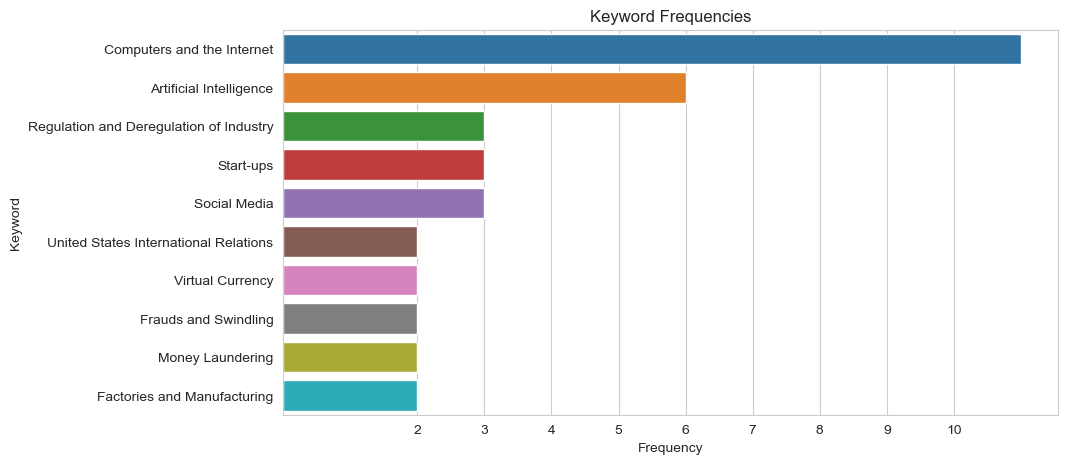

In [63]:
#Create a bar chart for the top 10 keywords found

#get the top 10 from keywords
top10 = keywords.head(10)
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
plt.xticks(range(min(top10['count']),max(top10['count'])))
sns.barplot(data=top10, x='count', y='des_facet')

#Add labels to graph
plt.title('Keyword Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Keyword')

plt.show()